In [1]:
import gensim

In [2]:
from gensim.test.utils import common_corpus
from gensim.models import ldaseqmodel

In [3]:
from gensim import corpora

In [4]:
from scipy.sparse import csc

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('converted_data.csv',index_col=[0])

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
vectorizer = CountVectorizer(stop_words={'english'},max_df=.7,min_df=2,ngram_range=(1,2),token_pattern=r'(?u)\b[A-Za-z]+\b')
matrix = vectorizer.fit_transform(df_processing.back_to_strings)
matrix_df = pd.DataFrame(matrix.toarray(),columns=vectorizer.get_feature_names())

In [9]:
df_processing = df[['back_to_strings', 'year']]

In [11]:
df_processing = df_processing.sort_values(by='year')

In [12]:
time_slice = df_processing.year.value_counts().reset_index().sort_values(by='index')

In [14]:
time_slice

,index,year
38,2022-01-31,1
39,2022-02-10,1
40,2022-02-22,1
37,2022-02-24,1
36,2022-03-03,2
32,2022-03-04,6
33,2022-03-05,4
35,2022-03-06,2
22,2022-03-07,27
10,2022-03-08,35


In [17]:
time_slice = list(time_slice.year)

In [18]:
add = 0
for i in time_slice:
    add += i

In [20]:
time_slice = [250,250,250,255]

In [21]:
lists = [x.split() for x in df_processing.back_to_strings]

In [22]:
matrix.toarray()[0]

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
list_of_values = vectorizer.get_feature_names()

In [24]:
list_of_answers = []
for j in df_processing.back_to_strings:
    answer = []
    for i in j.split():
        if i in list_of_values:
            answer.append(i)
    list_of_answers.append(answer)

In [25]:
dictionary = corpora.Dictionary()
BoW_corpus = [dictionary.doc2bow(doc, allow_update=True) for doc in list_of_answers]

In [26]:
ldaseq = ldaseqmodel.LdaSeqModel(corpus=BoW_corpus, time_slice=time_slice, num_topics=10, chunksize=100)

/Users/liammoran/opt/anaconda3/lib/python3.8/site-packages/gensim/models/ldaseqmodel.py:297: RuntimeWarning: divide by zero encountered in double_scalars
  convergence = np.fabs((bound - old_bound) / old_bound)


In [29]:
ldaseq.print_topics()

[[('822', 0.02188168933715547),
  ('684', 0.020969273602888683),
  ('1430', 0.007498513049214615),
  ('441', 0.004085967881631406),
  ('327', 0.0036705324914095196),
  ('489', 0.003409835334459035),
  ('196', 0.003123327270230098),
  ('542', 0.00295464172397948),
  ('158', 0.0029329174997756186),
  ('433', 0.0028437365874959086),
  ('686', 0.0028394961138713754),
  ('2031', 0.0028019703109155403),
  ('904', 0.002779314530116176),
  ('1408', 0.0027368975454852853),
  ('165', 0.0025970503584106215),
  ('863', 0.0025354142232276314),
  ('322', 0.002503903735373961),
  ('572', 0.002444786504431382),
  ('862', 0.0024319603518554844),
  ('964', 0.0023624684528673182)],
 [('441', 0.011879494106927183),
  ('52', 0.00820361096447999),
  ('144', 0.006537053944557106),
  ('223', 0.005501306760963312),
  ('1743', 0.004534002284187801),
  ('322', 0.0042911870054916455),
  ('187', 0.0036001230083714648),
  ('1527', 0.00357535501611361),
  ('2232', 0.003553189550778848),
  ('1430', 0.0034595990422510

In [31]:
all_topics = []
for i in range(10):
    topic = ldaseq.print_topic(i)
    topic_list=[]
    for j in topic:
        topic_list.append((dictionary[int(j[0])],j[1]))
    all_topics.append(topic_list)


In [32]:
def show_topic(model,topic=0):
    topic=ldaseq.print_topic(topic)
    topic_list=[]
    for j in topic:
        topic_list.append((dictionary[int(j[0])],j[1]))
    all_topics.append(topic_list)
    return topic_list

In [44]:
show_topic(ldaseq,5)

[('russian', 0.02205995083842166),
 ('ukraine', 0.018364556175770725),
 ('war', 0.017916043804176024),
 ('russia', 0.013428144520836856),
 ('ukrainian', 0.012428145076288881),
 ('state', 0.010652559925254414),
 ('abortion', 0.009423669733684144),
 ('country', 0.008280925494489395),
 ('military', 0.008190529901845156),
 ('putin', 0.00800660005484525),
 ('people', 0.006073506112613963),
 ('force', 0.005981078222030074),
 ('invasion', 0.004866739079787077),
 ('them', 0.004634508783520639),
 ('united', 0.004349340033916843),
 ('city', 0.004281050547409863),
 ('u', 0.004222284433908452),
 ('world', 0.004129153213775817),
 ('now', 0.003943779978672964),
 ('day', 0.003932338670648497)]

In [47]:
def show_topic_per_slice(model, topic=0):
    time_periods = [1,2,3,4]
    slice_dict={}
    topic_list = ldaseq.print_topic_times(topic, top_terms=8)
    for i in range(len(topic_list)):
        inner_list = []
        for j in topic_list[i]:
            inner_list.append((dictionary[int(j[0])],j[1]))
        slice_dict[time_periods[i]]=inner_list
    return slice_dict

In [49]:
topic_3 = show_topic_per_slice(ldaseq, topic=5)

In [77]:
topic_3[1]

[('russian', 0.02205995083842166),
 ('ukraine', 0.018364556175770725),
 ('war', 0.017916043804176024),
 ('russia', 0.013428144520836856),
 ('ukrainian', 0.012428145076288881),
 ('state', 0.010652559925254414),
 ('abortion', 0.009423669733684144),
 ('country', 0.008280925494489395)]

In [75]:
final_answer = [[],[],[]]
for time_slice in topic_3:
    time_period = topic_3[time_slice]
    for word_index in range(3):
        final_answer[word_index].append(time_period[word_index][1])
        
        

In [79]:
russian = final_answer[0]
ukraine = final_answer[1]
war = final_answer[2]

In [80]:
time_periods = [1,2,3,4]


In [81]:
import matplotlib.pyplot as plt

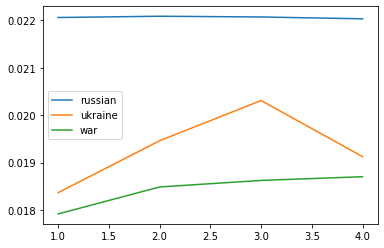

In [84]:
plt.plot(time_periods, russian, label='russian')
plt.plot(time_periods, ukraine, label='ukraine')
plt.plot(time_periods, war, label='war')
plt.legend()

In [97]:
topic_4 = show_topic_per_slice(ldaseq, topic=9)

In [98]:
topic_4

{1: [('dr', 0.024024355707359397),
  ('china', 0.01076561935486662),
  ('drug', 0.008006882413095013),
  ('patient', 0.007503793637438015),
  ('chinese', 0.007487624304500799),
  ('people', 0.005909426688491436),
  ('study', 0.005694539153953912),
  ('university', 0.005315616400206009)],
 2: [('dr', 0.0241310384490423),
  ('china', 0.01074438970154012),
  ('drug', 0.008206944019409934),
  ('chinese', 0.007484965337192639),
  ('patient', 0.007232419105082229),
  ('people', 0.0059413838889646586),
  ('study', 0.005460055452949309),
  ('university', 0.005342701435834209)],
 3: [('dr', 0.02407725151916541),
  ('china', 0.010602975143862211),
  ('drug', 0.008573243926061479),
  ('patient', 0.007442187257216164),
  ('chinese', 0.007409377493002889),
  ('people', 0.005968586505264079),
  ('hong', 0.0056580016296504795),
  ('study', 0.005587129904134411)],
 4: [('dr', 0.02408098566375488),
  ('china', 0.010484330175254474),
  ('drug', 0.00874812422815736),
  ('patient', 0.007631609310825086),


In [100]:
final_answer = [[],[],[],[]]
for time_slice in topic_3:
    time_period = topic_3[time_slice]
    for word_index in range(4):
        final_answer[word_index].append(time_period[word_index][1])

In [101]:
dr = final_answer[0]
china = final_answer[1]
drug = final_answer[2]
patient = final_answer[3]

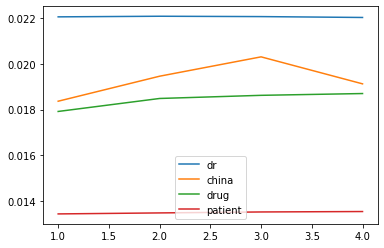

In [103]:
plt.plot(time_periods, dr, label='dr')
plt.plot(time_periods, china, label='china')
plt.plot(time_periods, drug, label='drug')
plt.plot(time_periods, patient, label='patient')
plt.legend()